In [44]:
URL= 'https://data.winnipeg.ca/api/views/mer2-irmb/rows.csv?accessType=DOWNLOAD'

In [45]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Recent_Transit_On-Time_Performance_Data')

('Recent_Transit_On-Time_Performance_Data',
 <http.client.HTTPMessage at 0x22b8ba70ef0>)

In [46]:
!head Transit_Pass-ups.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [47]:
import pandas as pd
data = pd.read_csv('Recent_Transit_On-Time_Performance_Data', index_col = 'Time', parse_dates = True)
data.head()

,Pass-Up ID,Pass-Up Type,Route Number,Route Name,Route Destination,Location
Time,,,,,,
2013-06-17 16:22:07,1132553,Full Bus Pass-Up,NaN,NaN,NaN,NaN
2013-03-26 13:43:07,1052245,Wheelchair User Pass-Up,45.0,Talbot,To Kildonan Place,NaN
2019-10-30 15:52:39,3038885,Full Bus Pass-Up,71.0,Arlington,via Sinclair to WalMart,POINT (-97.168133009356 49.902525502534)
2019-10-30 16:49:18,3038990,Full Bus Pass-Up,162.0,Ft. Richmond-St. Norbert Express,To St.Norbert,POINT (-97.139020101836 49.892922865173)
2019-10-30 07:13:01,3038314,Full Bus Pass-Up,28.0,Brookside Express,via Omands Creek,POINT (-97.152386734568 49.896572778324)


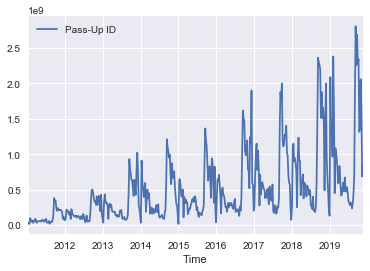

In [50]:
%matplotlib inline
del data['Route Number']
data.resample('W').sum().plot();

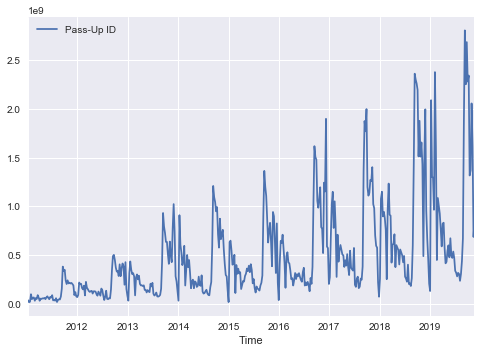

In [53]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['Pass-Up ID', 'Pass-Up Type', 'Route Name', 'Route Destination', 'Location']
data.resample('W').sum().plot()

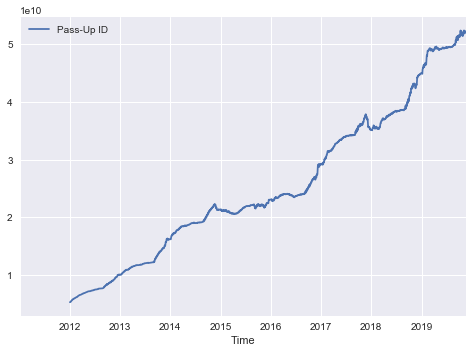

In [54]:
data.resample('D').sum().rolling(365).sum().plot()

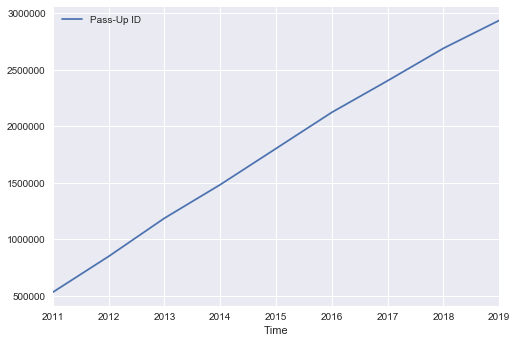

In [55]:
data.groupby(data.index.year).mean().plot();

In [34]:
pivoted = data.pivot_table('Pass-Up ID', index = data.index.year, columns = data.index.year.notnull())
pivoted.iloc[:5, :5]

,True
Time,
2011,5.312989e+05
2012,8.482038e+05
2013,1.186405e+06
2014,1.483116e+06
2015,1.803065e+06


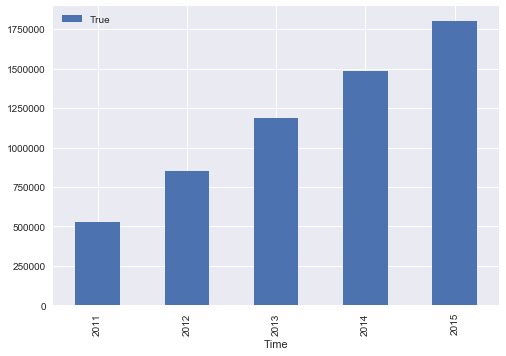

In [35]:
pivoted.iloc[:5, :5].plot(kind='bar')
